### We rate dogs twitter tweets data wrangling project

### Introduction
> Data is retrieved from 3 different sources: twiiter enhanched file, url and Twitter API.
> The data comes in 3 different formats: csv, tsv and JSON

### Data sourcing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import time
import json 
import os
import io

%matplotlib inline 

In [2]:
#read twitter enhanced 
df_te = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#read url 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open(url.split('/')[-1], mode='wb').write(r.content)

#load tsv to df
df_tsv = pd.read_csv(url.split('/')[-1], sep='\t')

In [77]:
#access twitter api
extract_api = True

#set twitter api keys
if extract_api:
    consumer_key = '...'
    consumer_secret = '...'
    access_token = '...'
    access_secret = '...'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

In [78]:
#save tweets to a txt file
#took 33 minutes durring the 1st run
if extract_api:
    id_errors = []

    start = time.time()
    print('Begin Twitter Query')

    with open('tweet_json.txt', 'w') as file:
        for tweet_id in list(df_te['tweet_id']):
            try:
                status = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(status._json, file)
                file.write('\n')
            except:
                id_errors.append(tweet_id)
    end = time.time()
    print('Finished. Time taken {}.'.format(end - start))


Begin Twitter Query
Finished. Time taken 2226.924498319626.


In [4]:
# txt file to df
df_tw = pd.DataFrame()

#open text file
with open('tweet_json.txt', encoding='utf8', mode='r') as json_file:
    #iterate through each line
    for line in json_file:
        #read each json line into a dictionary
        data = json.loads(json_file.readline())

        #add the id, favorite_count and retweet_count into a df
        line_df = pd.DataFrame.from_records([{'tweet_id': data['id'],
                                               'favorite_count': data['favorite_count'],
                                               'retweet_count' : data['retweet_count']}])
        
        #append the row to the master df
        df_tw = df_tw.append(line_df)

df_tw.reset_index(drop=True, inplace=True)
df_tw.to_csv('tweet_json.csv', index=False)

C:\Users\JENGA\AppData\Local\Temp\ipykernel_6680\3336161890.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tw = df_tw.append(line_df)
C:\Users\JENGA\AppData\Local\Temp\ipykernel_6680\3336161890.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tw = df_tw.append(line_df)
C:\Users\JENGA\AppData\Local\Temp\ipykernel_6680\3336161890.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tw = df_tw.append(line_df)
C:\Users\JENGA\AppData\Local\Temp\ipykernel_6680\3336161890.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tw = df_tw.append(line_df)
C:\Users\JENGA\AppData\Local\Temp\ipykernel_6680\3336161890.py:17: Futur

### Data assessment

In [5]:
#head of the twitter enhanced file
df_te.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
#head of the tsv file
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#head of the twitter api file
df_tw.head()

,tweet_id,favorite_count,retweet_count
0,892177421306343426,33819,6514
1,891689557279858688,42908,8964
2,891087950875897856,20562,3261
3,890729181411237888,56848,16716
4,890240255349198849,32467,7711


In [8]:
#summary of the dataframes
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   favorite_count  1177 non-null   int64
 2   retweet_count   1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [11]:
df_te.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_tsv.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
df_tw.describe()

,tweet_id,favorite_count,retweet_count
count,1.177000e+03,1177.000000,1177.000000
mean,7.426493e+17,7901.181818,3107.338997
std,6.851760e+16,11536.383916,5458.476288
min,6.660209e+17,0.000000,2.000000
25%,6.783968e+17,1339.000000,613.000000
50%,7.193678e+17,3553.000000,1460.000000
75%,7.992971e+17,9872.000000,3628.000000
max,8.921774e+17,131075.000000,79515.000000


In [14]:
#explore ratings
df_te.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
df_te.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
#count dog names
df_te.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
#check for duplicate tweets
df_tw.tweet_id.duplicated().sum(),
df_te.tweet_id.duplicated().sum(),
df_tsv.tweet_id.duplicated().sum()

0

In [18]:
#how many image predictions are not dogs
df_tsv.query('(p1_dog == False ) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [19]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Quality issues
##### Completeness
> 1. df_te - Cumberfloof not identified as floofer
> 2. df_te - Missing and incorrect dog names

##### Validity
> 1. df_te - Replied do not have images
> 2. df_te - Retweets may capture the same dog twice with a different tweet_id
> 3. df_tsv - 324 predictions where the top 3 predictions are not dog breeds

##### Consistency
> 1. df_te - Timestamp column is a string
> 2. df_te - Source displays url

##### Tidiness issues
> Each variable forms a column
> 1. df_tsv - Four columns for stages of dog should be one category column

##### Merge all three tables since they are all parts of a single dataset
> 1. df_tsv - Observational unit is for image prediction. jpg_url should be part of df_te table


### Data cleaning

In [20]:
# copy the original data
df_te_clean = df_te.copy()
df_tsv_clean = df_tsv.copy()
df_tw_clean= df_tw.copy()

##### Define
> from df_te, find and replace dog names with None if possible

> It appears that names are lowercase tend to be invalid. Find and replace lowercase dog 'names' if possible.

> Replace with NaN if no name is found


> Resolve Issue 1

##### Code

In [21]:
#number of 'none' dog names
(df_te_clean.name == 'None').sum()

745

In [22]:
#list of lowercase dognames and 'None'
lower_list = list(df_te_clean[df_te_clean.name.str.islower()].name.value_counts().index)
lower_list.append('None')
lower_list

['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'actually',
 'mad',
 'not',
 'old',
 'life',
 'officially',
 'light',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'his',
 'my',
 'incredibly',
 'space',
 'None']

In [23]:
#query df where name matches 'a' and extract names
df_extract = df_te_clean[df_te_clean.name.str.match('a')].text.str.extract((r'(named\s\w+)')).dropna()
df_extract

,0
1853,named Wylie
1955,named Kip
2034,named Jacob
2066,named Rufus
2116,named Spork
2125,named Cherokee
2128,named Hemry
2146,named Alphred
2161,named Alfredo
2191,named Leroi


In [24]:
#slice and replace name
df_te_clean.loc[df_extract.index, 'name'] = df_extract[0].str.slice(6)

In [25]:
#which records with name 'a' and dog name is included later in tweet
df_te_clean[df_te_clean.name.str.match('a')].text.str.contains('name is ')

56      False
649     False
759     False
801     False
1002    False
1004    False
1017    False
1025    False
1040    False
1049    False
1138    False
1193    False
1207    False
1340    False
1351    False
1361    False
1362    False
1368    False
1382    False
1499    False
1693    False
1737    False
1785    False
1854    False
1877    False
1878    False
1923    False
1941    False
1994    False
2153    False
2198    False
2211    False
2222    False
2287     True
2327    False
2333    False
2334    False
2335    False
2347    False
2348    False
2349    False
2350    False
2352    False
2353    False
2354    False
Name: text, dtype: bool

In [26]:
#check text for name
df_te_clean.loc[2287].text

"This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"

In [27]:
#fix single name entry
df_te_clean.loc[2287, 'name'] = 'Daryl'

In [28]:
#replace all other lowecase names and 'None' with NaN
df_te_clean.name = df_te_clean.name.replace(lower_list, np.nan)

##### Test

In [29]:
#check for clean names
df_te_clean.name.value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
              ..
Bayley         1
Meatball       1
Storkson       1
Remy           1
Christoper     1
Name: name, Length: 949, dtype: int64

##### Define
>From df_te, add floffer category for 'floof' keyword

>Resolve Issue 2

##### Code

In [30]:
#find index of all tweets where the text contains 'floof'
index_floof = df_te_clean[df_te_clean.text.str.contains('floof')].index

In [31]:
#change floofer category to floofer
df_te_clean.loc[index_floof, 'floofer'] = 'floofer'

##### Test

In [32]:
df_te_clean.floofer.value_counts()

None       2327
floofer      29
Name: floofer, dtype: int64

##### Define
> From df_te, drop retweeted columns


> Resolves Issue 4

##### Code

In [33]:
df_te_clean = df_te_clean[df_te_clean.retweeted_status_id.isnull()]

##### Test

In [34]:
#confirm all retweeted rows are dropped
df_te_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        1412 non-null   object 
 13  doggo                       2175 

In [35]:
#drop rewtweeted columns
df_te_clean = df_te_clean.drop(labels=['retweeted_status_id', 'retweeted_status_timestamp'], axis=1)

In [36]:
#confirm retweeted columns are dropped
df_te_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2175 non-null   int64  
 1   in_reply_to_status_id     78 non-null     float64
 2   in_reply_to_user_id       78 non-null     float64
 3   timestamp                 2175 non-null   object 
 4   source                    2175 non-null   object 
 5   text                      2175 non-null   object 
 6   retweeted_status_user_id  0 non-null      float64
 7   expanded_urls             2117 non-null   object 
 8   rating_numerator          2175 non-null   int64  
 9   rating_denominator        2175 non-null   int64  
 10  name                      1412 non-null   object 
 11  doggo                     2175 non-null   object 
 12  floofer                   2175 non-null   object 
 13  pupper                    2175 non-null   object 
 14  puppo   

##### Define
> From df_te, Drop in_reply_to_status_id and in_reply_to_user_id

> Resolve Issue 5

##### Code

In [37]:
df_te_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

##### Test

In [38]:
df_te_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [39]:
df_te_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2175 non-null   int64  
 1   timestamp                 2175 non-null   object 
 2   source                    2175 non-null   object 
 3   text                      2175 non-null   object 
 4   retweeted_status_user_id  0 non-null      float64
 5   expanded_urls             2117 non-null   object 
 6   rating_numerator          2175 non-null   int64  
 7   rating_denominator        2175 non-null   int64  
 8   name                      1412 non-null   object 
 9   doggo                     2175 non-null   object 
 10  floofer                   2175 non-null   object 
 11  pupper                    2175 non-null   object 
 12  puppo                     2175 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 237.9+ KB


##### Define
> From df_tsv - Drop rows where all predictions of dog breed is not a dog

> Resolves issue 8

##### Code

In [40]:
#keep rows with at least one dog prediction
df_tsv_clean = df_tsv_clean.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

##### Test

In [41]:
df_tsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


##### Define
> From df_te, convert timestamp to datetime

> Resolves Issue 9

##### Code

In [42]:
df_te_clean.timestamp = pd.to_datetime(df_te_clean.timestamp)

##### Test

In [43]:
df_te_clean.timestamp.dtypes

datetime64[ns, UTC]

##### Define
> From df_ae, strip source to remove the HTML link

> Resolves Issue 10

##### Code

In [44]:
#define function to strip source link
def strip_link(x):
    return x.split('>', 1)[-1][:-4]

In [45]:
#apply to colujmn
df_te_clean['source'] = df_te_clean['source'].apply(strip_link)

##### Test

In [46]:
df_te_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### Define
> Simplify 3 tables to 2 by joining (inner) df_te with df_tw to create one tweet observation tables

##### Code

In [47]:
df_te_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2175 non-null   int64              
 1   timestamp                 2175 non-null   datetime64[ns, UTC]
 2   source                    2175 non-null   object             
 3   text                      2175 non-null   object             
 4   retweeted_status_user_id  0 non-null      float64            
 5   expanded_urls             2117 non-null   object             
 6   rating_numerator          2175 non-null   int64              
 7   rating_denominator        2175 non-null   int64              
 8   name                      1412 non-null   object             
 9   doggo                     2175 non-null   object             
 10  floofer                   2175 non-null   object             
 11  pupper           

In [48]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   favorite_count  1177 non-null   int64
 2   retweet_count   1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [49]:
df_merged = df_tw_clean.merge(df_te_clean, left_on='tweet_id', right_on='tweet_id')

##### Test

In [50]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1085 non-null   int64              
 1   favorite_count            1085 non-null   int64              
 2   retweet_count             1085 non-null   int64              
 3   timestamp                 1085 non-null   datetime64[ns, UTC]
 4   source                    1085 non-null   object             
 5   text                      1085 non-null   object             
 6   retweeted_status_user_id  0 non-null      float64            
 7   expanded_urls             1052 non-null   object             
 8   rating_numerator          1085 non-null   int64              
 9   rating_denominator        1085 non-null   int64              
 10  name                      711 non-null    object             
 11  doggo            

##### Define
> From df_tweet melt columns "doggo, floofer, pupper, puppo" into one column dog_stage

> Resolves issue 11

##### Code

In [51]:
#replace all NaN and 'None' dog_stage to an empty_string
df_merged.doggo.replace('None', '', inplace=True)
df_merged.doggo.replace(np.NaN, '', inplace=True)
df_merged.floofer.replace('None', '', inplace=True)
df_merged.floofer.replace(np.NaN, '', inplace=True)
df_merged.pupper.replace('None', '', inplace=True)
df_merged.pupper.replace(np.NaN, '', inplace=True)
df_merged.puppo.replace('None', '', inplace=True)
df_merged.puppo.replace(np.NaN, '', inplace=True)

In [52]:
#group by dog_stage
df_merged.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0:'count'})

,doggo,floofer,pupper,puppo,count
0,,,,,892
1,,,,puppo,9
2,,,pupper,,119
3,,floofer,,,18
4,doggo,,,,42
5,doggo,,pupper,,4
6,doggo,floofer,,,1


In [53]:
#combine dog_stages into a single column
df_merged['dog_stage'] = df_merged.doggo + df_merged.floofer + df_merged.pupper + df_merged.puppo

#fix multiple stage rows
df_merged.loc[df_merged.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_merged.loc[df_merged.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

In [54]:
#drop previous dog stage columns
df_merged.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [55]:
df_merged.dog_stage.value_counts()

                 892
pupper           119
doggo             42
floofer           18
puppo              9
doggo, pupper      4
doggofloofer       1
Name: dog_stage, dtype: int64

##### Define
> From df_ip, move jpg_url column to df_tweet


##### Code

In [56]:
df_merged= df_merged.merge(df_tsv[['tweet_id', 'jpg_url']], left_on='tweet_id', right_on='tweet_id')

In [57]:
df_tsv_clean.drop('jpg_url', axis=1, inplace=True)

##### Test

In [58]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 992
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  993 non-null    int64              
 1   favorite_count            993 non-null    int64              
 2   retweet_count             993 non-null    int64              
 3   timestamp                 993 non-null    datetime64[ns, UTC]
 4   source                    993 non-null    object             
 5   text                      993 non-null    object             
 6   retweeted_status_user_id  0 non-null      float64            
 7   expanded_urls             993 non-null    object             
 8   rating_numerator          993 non-null    int64              
 9   rating_denominator        993 non-null    int64              
 10  name                      692 non-null    object             
 11  dog_stage          

In [60]:
df_tsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   img_num   1751 non-null   int64  
 2   p1        1751 non-null   object 
 3   p1_conf   1751 non-null   float64
 4   p1_dog    1751 non-null   bool   
 5   p2        1751 non-null   object 
 6   p2_conf   1751 non-null   float64
 7   p2_dog    1751 non-null   bool   
 8   p3        1751 non-null   object 
 9   p3_conf   1751 non-null   float64
 10  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 128.2+ KB


### Data storing

In [59]:
#sort list for aesthetics
df_merged = df_merged.reindex(sorted(df_merged.columns, reverse=True), axis=1)

In [60]:
#export to csv
df_merged.to_csv('twitter_archive_master.csv', index=False)
df_tsv_clean.to_csv('twitter_image_prediction_master.csv', index=False)

### Visualization

In [61]:
#extract and sort timestamp, favorites and retweets
engage = df_merged[['timestamp', 'favorite_count', 'retweet_count']].sort_values(['timestamp', 'favorite_count'])

In [62]:
#create moving averages
window = 30
rolling_likes = engage.favorite_count.rolling(window=window).mean()[window-1:]
rolling_retweets = engage.retweet_count.rolling(window=window).mean()[window-1:]

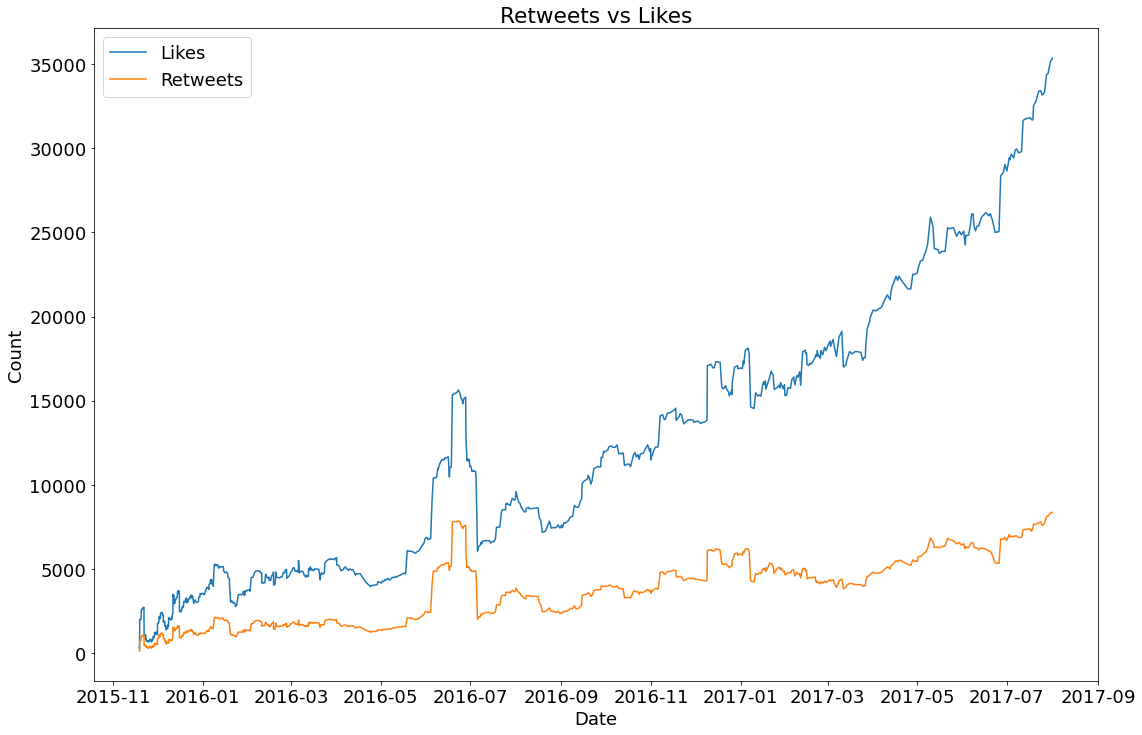

In [63]:
#plot a line graph
plt.figure(figsize=(18, 12))
plt.rcParams.update({'font.size': 18})
plt.title('Retweets vs Likes')
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(engage.timestamp[window-1:], rolling_likes, label='Likes')
plt.plot(engage.timestamp[window-1:], rolling_retweets, label='Retweets')
plt.legend()
plt.savefig('retweets_likes_over_time.png')

In [64]:
#find the average likes by dog stage
dog_stage_likes = df_merged[['dog_stage', 'favorite_count']]
dog_stage_likes = dog_stage_likes.query('dog_stage != ""')
dog_stage_likes = dog_stage_likes.groupby('dog_stage').mean()

x_pos = list(dog_stage_likes.index.str.capitalize())
y_pos = list(dog_stage_likes.favorite_count)

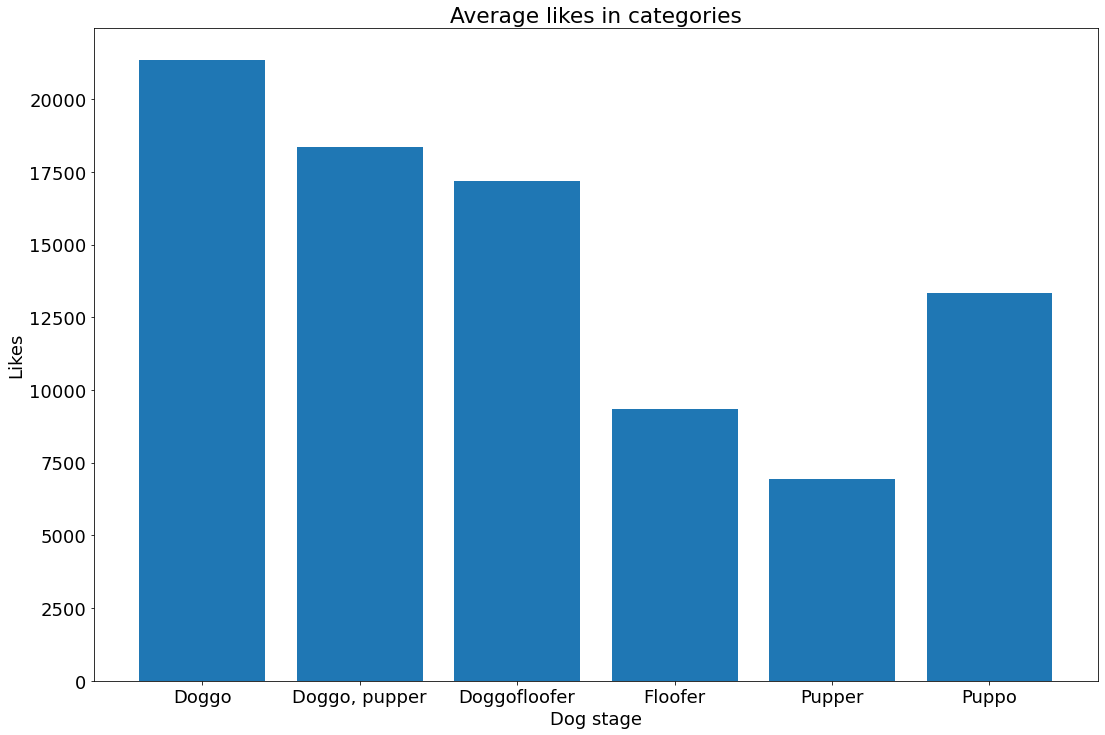

In [65]:
#plot results on a bar graph
plt.figure(figsize=(18, 12))
plt.rcParams.update({'font.size':18})
plt.title('Average likes in categories')
plt.xlabel('Dog stage')
plt.ylabel('Likes')
plt.bar(x_pos, y_pos)
plt.savefig('likes_dog_stage.png')

### Conclusion
> The amount of retweets is related to the amount of likes


> The amount of retweets and likes increase over time


> Doggo and doggo,pupper categories have the most likes

> Pupper category has the least amount of likes